In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import auc, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay

In [2]:
colNames = []
for i in range(51):
    colNames.append(f'B{i}')

test = pd.read_csv('_annotations.txt', sep=' ', names=colNames, header=None)

In [3]:
test = test.fillna(0)

In [4]:
len(test)

85

In [5]:
testData = []
colSizeTest = []
# tmp = np.arr
for i in range(len(test)):
    colIter = 0
    for j in range(1,51):
        tmp = test.iloc[i][j]
        if tmp != 0:
            colIter += 1
            tmp2 = tmp.split(',')
            print(tmp2)
            tmp4 = list(map(float, tmp2))
            testData.append(tmp4)
    colSizeTest.append(colIter)
    
fileNamesTest = test['B0']

['41', '78', '84', '166', '1']
['187', '105', '261', '235', '1']
['314', '89', '371', '196', '1']
['111', '148', '257', '287', '1']
['112', '211', '147', '275', '1']
['174', '15', '206', '76', '1']
['201', '87', '239', '157', '1']
['224', '37', '255', '98', '1']
['289', '126', '311', '166', '1']
['350', '133', '371', '174', '1']
['29', '85', '51', '111', '1']
['99', '70', '117', '98', '1']
['60', '111', '69', '128', '1']
['134', '92', '146', '113', '1']
['169', '81', '184', '115', '1']
['212', '89', '229', '124', '1']
['290', '91', '302', '126', '1']
['351', '85', '366', '117', '1']
['241', '135', '245', '144', '1']
['409', '145', '413', '154', '1']
['403', '146', '409', '157', '1']
['42', '88', '58', '114', '1']
['107', '69', '124', '97', '1']
['195', '92', '209', '113', '1']
['273', '130', '288', '158', '1']
['362', '109', '376', '133', '0']
['395', '127', '410', '155', '1']
['130', '156', '264', '270', '2']
['50', '134', '87', '213', '1']
['117', '142', '178', '241', '1']
['67', '68

In [6]:
testData

[[41.0, 78.0, 84.0, 166.0, 1.0],
 [187.0, 105.0, 261.0, 235.0, 1.0],
 [314.0, 89.0, 371.0, 196.0, 1.0],
 [111.0, 148.0, 257.0, 287.0, 1.0],
 [112.0, 211.0, 147.0, 275.0, 1.0],
 [174.0, 15.0, 206.0, 76.0, 1.0],
 [201.0, 87.0, 239.0, 157.0, 1.0],
 [224.0, 37.0, 255.0, 98.0, 1.0],
 [289.0, 126.0, 311.0, 166.0, 1.0],
 [350.0, 133.0, 371.0, 174.0, 1.0],
 [29.0, 85.0, 51.0, 111.0, 1.0],
 [99.0, 70.0, 117.0, 98.0, 1.0],
 [60.0, 111.0, 69.0, 128.0, 1.0],
 [134.0, 92.0, 146.0, 113.0, 1.0],
 [169.0, 81.0, 184.0, 115.0, 1.0],
 [212.0, 89.0, 229.0, 124.0, 1.0],
 [290.0, 91.0, 302.0, 126.0, 1.0],
 [351.0, 85.0, 366.0, 117.0, 1.0],
 [241.0, 135.0, 245.0, 144.0, 1.0],
 [409.0, 145.0, 413.0, 154.0, 1.0],
 [403.0, 146.0, 409.0, 157.0, 1.0],
 [42.0, 88.0, 58.0, 114.0, 1.0],
 [107.0, 69.0, 124.0, 97.0, 1.0],
 [195.0, 92.0, 209.0, 113.0, 1.0],
 [273.0, 130.0, 288.0, 158.0, 1.0],
 [362.0, 109.0, 376.0, 133.0, 0.0],
 [395.0, 127.0, 410.0, 155.0, 1.0],
 [130.0, 156.0, 264.0, 270.0, 2.0],
 [50.0, 134.0, 87.0,

In [7]:
colSizeTest
fibTest = []
fibTest.append(0)
totalTest = 0
for i in range(0,len(colSizeTest)):
    totalTest = totalTest + colSizeTest[i]
    fibTest.append(totalTest)

In [8]:
fileNamesTest

0     maksssksksss397_png.rf.067823344727b8476f947a9...
1     maksssksksss273_png.rf.0b54a8109d74ca705f3f9e0...
2     maksssksksss572_png.rf.07abf21a411bde33d104b44...
3     maksssksksss277_png.rf.0d59290653dde9467343eee...
4     maksssksksss728_png.rf.0d07189c65a97afd62fb232...
                            ...                        
80    maksssksksss620_png.rf.fe3ce0ee4e305a6aecb983f...
81    maksssksksss587_png.rf.ebcbd6cc90b9da18fce2d93...
82    maksssksksss663_png.rf.f2432361f8252606ebb6765...
83    maksssksksss329_png.rf.fa8006f8b9458d77d296ee5...
84    maksssksksss741_png.rf.ef6f86c800f887f96a2b6b9...
Name: B0, Length: 85, dtype: object

In [9]:
listGTBoxesDict = []

for i in range(len(fibTest)-1):
    GTBox = []
    for j in range(fibTest[i],fibTest[i+1]):
        GTBox.append(testData[j][0:4])
        
    GTBoxDict = {fileNamesTest[i]: GTBox}
    listGTBoxesDict.append(GTBoxDict)

In [10]:
# listPredBoxesDict = {}

for i in range(len(fibTest)-1):
    GTBox = []
    for j in range(fibTest[i],fibTest[i+1]):#########
        GTBox.append(testData[j][0:4])
        
    GTBoxDict = {fileNamesTest[i]: GTBox}
    if i == 0:
        dictGTBoxesDict = GTBoxDict
    else:
        dictGTBoxesDict.update(GTBoxDict)

In [11]:
listGTBoxesDict

[{'maksssksksss397_png.rf.067823344727b8476f947a915f37114d.jpg': [[41.0,
    78.0,
    84.0,
    166.0],
   [187.0, 105.0, 261.0, 235.0],
   [314.0, 89.0, 371.0, 196.0]]},
 {'maksssksksss273_png.rf.0b54a8109d74ca705f3f9e0a45622933.jpg': [[111.0,
    148.0,
    257.0,
    287.0]]},
 {'maksssksksss572_png.rf.07abf21a411bde33d104b44fcf13fe83.jpg': [[112.0,
    211.0,
    147.0,
    275.0],
   [174.0, 15.0, 206.0, 76.0],
   [201.0, 87.0, 239.0, 157.0],
   [224.0, 37.0, 255.0, 98.0],
   [289.0, 126.0, 311.0, 166.0],
   [350.0, 133.0, 371.0, 174.0]]},
 {'maksssksksss277_png.rf.0d59290653dde9467343eee6b88dee95.jpg': [[29.0,
    85.0,
    51.0,
    111.0],
   [99.0, 70.0, 117.0, 98.0],
   [60.0, 111.0, 69.0, 128.0],
   [134.0, 92.0, 146.0, 113.0],
   [169.0, 81.0, 184.0, 115.0],
   [212.0, 89.0, 229.0, 124.0],
   [290.0, 91.0, 302.0, 126.0],
   [351.0, 85.0, 366.0, 117.0],
   [241.0, 135.0, 245.0, 144.0],
   [409.0, 145.0, 413.0, 154.0],
   [403.0, 146.0, 409.0, 157.0]]},
 {'maksssksksss728_pn

In [12]:
dictGTBoxesDict

{'maksssksksss397_png.rf.067823344727b8476f947a915f37114d.jpg': [[41.0,
   78.0,
   84.0,
   166.0],
  [187.0, 105.0, 261.0, 235.0],
  [314.0, 89.0, 371.0, 196.0]],
 'maksssksksss273_png.rf.0b54a8109d74ca705f3f9e0a45622933.jpg': [[111.0,
   148.0,
   257.0,
   287.0]],
 'maksssksksss572_png.rf.07abf21a411bde33d104b44fcf13fe83.jpg': [[112.0,
   211.0,
   147.0,
   275.0],
  [174.0, 15.0, 206.0, 76.0],
  [201.0, 87.0, 239.0, 157.0],
  [224.0, 37.0, 255.0, 98.0],
  [289.0, 126.0, 311.0, 166.0],
  [350.0, 133.0, 371.0, 174.0]],
 'maksssksksss277_png.rf.0d59290653dde9467343eee6b88dee95.jpg': [[29.0,
   85.0,
   51.0,
   111.0],
  [99.0, 70.0, 117.0, 98.0],
  [60.0, 111.0, 69.0, 128.0],
  [134.0, 92.0, 146.0, 113.0],
  [169.0, 81.0, 184.0, 115.0],
  [212.0, 89.0, 229.0, 124.0],
  [290.0, 91.0, 302.0, 126.0],
  [351.0, 85.0, 366.0, 117.0],
  [241.0, 135.0, 245.0, 144.0],
  [409.0, 145.0, 413.0, 154.0],
  [403.0, 146.0, 409.0, 157.0]],
 'maksssksksss728_png.rf.0d07189c65a97afd62fb232f26cc44a2.

## Predction DATA

In [13]:
colNamesYolo = []
for i in range(26):
    colNamesYolo.append(f'B{i}')

testYolo = pd.read_csv('Effnet_test_data_f.txt', sep='[', names=colNamesYolo, header=None)

In [14]:
testYolo = testYolo.fillna(0)

In [15]:
len(testYolo.index)

85

In [16]:
predictData = []
colSize = []
# tmp = np.arr
for i in range(len(testYolo.index)):
    colIter = 0
    for j in range(1,26):
        tmp = testYolo.iloc[i][j]
        if tmp != 0:
            colIter += 1
            tmp2 = tmp.replace("]", "")
            tmp3 = tmp2.replace(" ", "").replace("'", "").split(',')
            tmp4 = list(map(float, tmp3))
            predictData.append(tmp4)
    colSize.append(colIter)
    
tmp = testYolo['B0']
fileNamesPredict = []
for name in range(len(tmp)):
    fileNamesPredict.append(tmp[name].replace(',','').replace('test/', ''))

In [17]:
predictData

[[263.35776, 34.116177, 307.51355, 102.96403, 1.0, 1.0, 2.0],
 [119.75805, 144.42317, 177.28787, 245.73665, 1.0, 1.0, 2.0],
 [53.590202, 135.79475, 88.15835, 202.9714, 1.0, 1.0, 2.0],
 [193.65987, 189.27483, 280.43103, 307.55316, 1.0, 1.0, 2.0],
 [339.48218, 215.79066, 404.33643, 314.77625, 1.0, 1.0, 2.0],
 [69.83286, 73.511925, 109.0775, 148.23735, 1.0, 1.0, 2.0],
 [0.0, 251.7876, 79.201645, 390.76376, 1.0, 1.0, 2.0],
 [357.20956, 38.94775, 385.4797, 104.00106, 1.0, 1.0, 2.0],
 [93.71996, 159.55673, 108.219795, 196.6562, 1.0, 1.0, 2.0],
 [163.64163, 95.830185, 178.56116, 132.9312, 1.0, 1.0, 2.0],
 [58.279854, 156.39954, 90.51819, 214.67896, 1.0, 1.0, 2.0],
 [169.3274, 95.950714, 183.88002, 133.6027, 1.0, 1.0, 2.0],
 [98.78791, 163.07489, 113.010704, 200.96254, 1.0, 1.0, 2.0],
 [84.75296, 155.27205, 103.17832, 200.51085, 1.0, 1.0, 2.0],
 [398.32413, 37.27737, 412.59833, 68.58299, 1.0, 1.0, 3.0],
 [75.96699, 92.69587, 105.12633, 158.76071, 1.0, 1.0, 1.0],
 [359.40198, 14.072229, 375.011

In [18]:
(colSize)
fib = []
fib.append(0)
total = 0
for i in range(0,len(colSize)):
    total = total + colSize[i]
    fib.append(total)
colSize

[19,
 25,
 20,
 25,
 16,
 17,
 25,
 5,
 20,
 22,
 25,
 1,
 14,
 25,
 7,
 15,
 3,
 25,
 25,
 10,
 25,
 25,
 6,
 5,
 14,
 20,
 6,
 13,
 25,
 25,
 4,
 6,
 8,
 2,
 19,
 25,
 15,
 25,
 18,
 25,
 7,
 21,
 12,
 13,
 25,
 14,
 10,
 25,
 18,
 7,
 25,
 25,
 16,
 25,
 25,
 25,
 21,
 10,
 10,
 25,
 9,
 24,
 25,
 25,
 6,
 25,
 18,
 20,
 10,
 5,
 23,
 25,
 17,
 13,
 25,
 11,
 11,
 19,
 7,
 21,
 13,
 25,
 13,
 5,
 25]

In [19]:
pred1 = []
for ll in range(colSize[0]):
    pred1.append(predictData[ll][0:4])
    
score1 = []
for ll in range(colSize[0]):
    score1.append(predictData[ll][4])

score1

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

#### Converting to IoC format: dictionaries

In [20]:
predictData

[[263.35776, 34.116177, 307.51355, 102.96403, 1.0, 1.0, 2.0],
 [119.75805, 144.42317, 177.28787, 245.73665, 1.0, 1.0, 2.0],
 [53.590202, 135.79475, 88.15835, 202.9714, 1.0, 1.0, 2.0],
 [193.65987, 189.27483, 280.43103, 307.55316, 1.0, 1.0, 2.0],
 [339.48218, 215.79066, 404.33643, 314.77625, 1.0, 1.0, 2.0],
 [69.83286, 73.511925, 109.0775, 148.23735, 1.0, 1.0, 2.0],
 [0.0, 251.7876, 79.201645, 390.76376, 1.0, 1.0, 2.0],
 [357.20956, 38.94775, 385.4797, 104.00106, 1.0, 1.0, 2.0],
 [93.71996, 159.55673, 108.219795, 196.6562, 1.0, 1.0, 2.0],
 [163.64163, 95.830185, 178.56116, 132.9312, 1.0, 1.0, 2.0],
 [58.279854, 156.39954, 90.51819, 214.67896, 1.0, 1.0, 2.0],
 [169.3274, 95.950714, 183.88002, 133.6027, 1.0, 1.0, 2.0],
 [98.78791, 163.07489, 113.010704, 200.96254, 1.0, 1.0, 2.0],
 [84.75296, 155.27205, 103.17832, 200.51085, 1.0, 1.0, 2.0],
 [398.32413, 37.27737, 412.59833, 68.58299, 1.0, 1.0, 3.0],
 [75.96699, 92.69587, 105.12633, 158.76071, 1.0, 1.0, 1.0],
 [359.40198, 14.072229, 375.011

In [21]:
listPredBoxesDict = []

for i in range(len(fib)-1):
    predBox = []
    predScore = []
    for j in range(fib[i],fib[i+1]):
        predBox.append(predictData[j][0:4])
        predScore.append(predictData[j][4])
        
    yoloBoxDict = {fileNamesPredict[i]: {"boxes": predBox, "scores": predScore}}
    listPredBoxesDict.append(yoloBoxDict)

In [22]:
range(len(colSize))

range(0, 85)

In [23]:
# listPredBoxesDict = {}

for i in range(len(fib)-1):
    predBox = []
    predScore = []
    for j in range(fib[i],fib[i+1]):###############
        predBox.append(predictData[j][0:4])
        predScore.append(predictData[j][4])
        
    yoloBoxDict = {fileNamesPredict[i]: {"boxes": predBox, "scores": predScore}}
    if i == 0:
        dictPredBoxesDict = yoloBoxDict
    else:
        dictPredBoxesDict.update(yoloBoxDict)

In [24]:
i=0
range(colSize[i],colSize[i+1])

range(19, 25)

In [25]:
listPredBoxesDict

[{'maksssksksss704_png.rf.16080a3af1d012e2f503b7b9e3d606e6.jpg': {'boxes': [[263.35776,
     34.116177,
     307.51355,
     102.96403],
    [119.75805, 144.42317, 177.28787, 245.73665],
    [53.590202, 135.79475, 88.15835, 202.9714],
    [193.65987, 189.27483, 280.43103, 307.55316],
    [339.48218, 215.79066, 404.33643, 314.77625],
    [69.83286, 73.511925, 109.0775, 148.23735],
    [0.0, 251.7876, 79.201645, 390.76376],
    [357.20956, 38.94775, 385.4797, 104.00106],
    [93.71996, 159.55673, 108.219795, 196.6562],
    [163.64163, 95.830185, 178.56116, 132.9312],
    [58.279854, 156.39954, 90.51819, 214.67896],
    [169.3274, 95.950714, 183.88002, 133.6027],
    [98.78791, 163.07489, 113.010704, 200.96254],
    [84.75296, 155.27205, 103.17832, 200.51085],
    [398.32413, 37.27737, 412.59833, 68.58299],
    [75.96699, 92.69587, 105.12633, 158.76071],
    [359.40198, 14.072229, 375.01138, 44.489624],
    [52.064655, 65.01716, 112.24746, 174.64127],
    [62.102066, 104.7235, 100.9215, 1

In [26]:
dictPredBoxesDict

{'maksssksksss704_png.rf.16080a3af1d012e2f503b7b9e3d606e6.jpg': {'boxes': [[263.35776,
    34.116177,
    307.51355,
    102.96403],
   [119.75805, 144.42317, 177.28787, 245.73665],
   [53.590202, 135.79475, 88.15835, 202.9714],
   [193.65987, 189.27483, 280.43103, 307.55316],
   [339.48218, 215.79066, 404.33643, 314.77625],
   [69.83286, 73.511925, 109.0775, 148.23735],
   [0.0, 251.7876, 79.201645, 390.76376],
   [357.20956, 38.94775, 385.4797, 104.00106],
   [93.71996, 159.55673, 108.219795, 196.6562],
   [163.64163, 95.830185, 178.56116, 132.9312],
   [58.279854, 156.39954, 90.51819, 214.67896],
   [169.3274, 95.950714, 183.88002, 133.6027],
   [98.78791, 163.07489, 113.010704, 200.96254],
   [84.75296, 155.27205, 103.17832, 200.51085],
   [398.32413, 37.27737, 412.59833, 68.58299],
   [75.96699, 92.69587, 105.12633, 158.76071],
   [359.40198, 14.072229, 375.01138, 44.489624],
   [52.064655, 65.01716, 112.24746, 174.64127],
   [62.102066, 104.7235, 100.9215, 185.19098]],
  'scores'

In [27]:
import numpy as np
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
def get_model_scores(pred_boxes):
    """Creates a dictionary of from model_scores to image ids.
    Args:
        pred_boxes (dict): dict of dicts of 'boxes' and 'scores'
    Returns:
        dict: keys are model_scores and values are image ids (usually filenames)
    """
    model_score={}
    for img_id, val in pred_boxes.items():
        for score in val['scores']:
            if score not in model_score.keys():
                model_score[score]=[img_id]
            else:
                model_score[score].append(img_id)
    return model_score

## Calculating Scores

In [29]:
def calc_iou(gt_bbox, pred_bbox):
    '''
    This function takes the predicted bounding box and ground truth bounding box and 
    return the IoU ratio
    '''
    x_topleft_gt, y_topleft_gt, x_bottomright_gt, y_bottomright_gt= gt_bbox
    x_topleft_p, y_topleft_p, x_bottomright_p, y_bottomright_p= pred_bbox
    
    if (x_topleft_gt > x_bottomright_gt) or (y_topleft_gt> y_bottomright_gt):
        raise AssertionError("Ground Truth Bounding Box is not correct")
    if (x_topleft_p > x_bottomright_p) or (y_topleft_p> y_bottomright_p):
        raise AssertionError("Predicted Bounding Box is not correct",x_topleft_p, x_bottomright_p,y_topleft_p,y_bottomright_gt)
        
         
    #if the GT bbox and predcited BBox do not overlap then iou=0
    if(x_bottomright_gt< x_topleft_p):
        # If bottom right of x-coordinate  GT  bbox is less than or above the top left of x coordinate of  the predicted BBox
        
        return 0.0
    if(y_bottomright_gt< y_topleft_p):  # If bottom right of y-coordinate  GT  bbox is less than or above the top left of y coordinate of  the predicted BBox
        
        return 0.0
    if(x_topleft_gt> x_bottomright_p): # If bottom right of x-coordinate  GT  bbox is greater than or below the bottom right  of x coordinate of  the predcited BBox
        
        return 0.0
    if(y_topleft_gt> y_bottomright_p): # If bottom right of y-coordinate  GT  bbox is greater than or below the bottom right  of y coordinate of  the predcited BBox
        
        return 0.0
    
    
    GT_bbox_area = (x_bottomright_gt -  x_topleft_gt + 1) * (  y_bottomright_gt -y_topleft_gt + 1)
    Pred_bbox_area =(x_bottomright_p - x_topleft_p + 1 ) * ( y_bottomright_p -y_topleft_p + 1)
    
    x_top_left =np.max([x_topleft_gt, x_topleft_p])
    y_top_left = np.max([y_topleft_gt, y_topleft_p])
    x_bottom_right = np.min([x_bottomright_gt, x_bottomright_p])
    y_bottom_right = np.min([y_bottomright_gt, y_bottomright_p])
    
    intersection_area = (x_bottom_right- x_top_left + 1) * (y_bottom_right-y_top_left  + 1)
    
    union_area = (GT_bbox_area + Pred_bbox_area - intersection_area)
   
    return intersection_area/union_area

In [30]:
maxScores = []
meanScores = []
for imageName in fileNamesTest:
    gtBoxes = np.array(dictGTBoxesDict[imageName])
    predBoxes = np.array(dictPredBoxesDict[imageName]['boxes'])
    ioc_score = []
    for gt_bbox in gtBoxes:
        iocScoreBox = []
        for pred_bbox in predBoxes:
            print(gt_bbox)
            print(pred_bbox)
            iocScoreBox.append(calc_iou(gt_bbox, pred_bbox))
            
        ioc_score.append(max(iocScoreBox))
        
    maxScores.append(ioc_score)
    meanScores.append(np.mean(ioc_score))

[ 41.  78.  84. 166.]
[ 36.082584  82.30788   80.22647  162.08992 ]
[ 41.  78.  84. 166.]
[183.835   103.16614 269.16342 234.98602]
[ 41.  78.  84. 166.]
[313.5226   94.64024 369.11206 187.69487]
[ 41.  78.  84. 166.]
[250.75006    8.341489 282.8946    79.40905 ]
[ 41.  78.  84. 166.]
[399.39246 110.95426 413.19534 144.6675 ]
[ 41.  78.  84. 166.]
[22.306856 15.28404  45.26932  55.45943 ]
[ 41.  78.  84. 166.]
[161.94826    0.       180.80424   21.550493]
[ 41.  78.  84. 166.]
[318.7178   75.07175 343.06274 102.05163]
[ 41.  78.  84. 166.]
[393.39706 116.92562 408.7462  149.12363]
[ 41.  78.  84. 166.]
[399.9672   95.66256 413.51468 131.1267 ]
[ 41.  78.  84. 166.]
[ 21.345541 225.11058   37.76841  257.90546 ]
[ 41.  78.  84. 166.]
[151.60918 225.0277  166.11522 251.2389 ]
[187. 105. 261. 235.]
[ 36.082584  82.30788   80.22647  162.08992 ]
[187. 105. 261. 235.]
[183.835   103.16614 269.16342 234.98602]
[187. 105. 261. 235.]
[313.5226   94.64024 369.11206 187.69487]
[187. 105. 261. 235.

In [31]:
len(colSizeTest)

85

In [32]:
#!pip install ipympl

In [33]:
import numpy as np

In [34]:
print(meanScores)

[0.8155432286198782, 0.9280104378185946, 0.7754561403662238, 0.4542272500378642, 0.6682975132937962, 0.8376869076998161, 0.7951449185473497, 0.8188856361357107, 0.865393958530282, 0.22174562334608466, 0.2575886340117774, 0.4619370788399128, 0.26365866161832263, 0.44900501001888676, 0.5209070918081821, 0.22254195924647305, 0.6899598903182416, 0.7375061806613393, 0.5334490832383486, 0.8101125836345584, 0.7202910495440439, 0.684039541706208, 0.9246589565963678, 0.8000338687428861, 0.7661128091710847, 0.8651534202279686, 0.8718029420772629, 0.9058680346980725, 0.782605025750239, 0.778508003924392, 0.9509593430647929, 0.7426520721744112, 0.8474901498429808, 0.6969959266009209, 0.9178380909403892, 0.6611399333032355, 0.5172252712396249, 0.9175350799022534, 0.8171189806895155, 0.829371716072299, 0.6356027610292362, 0.8996472471833267, 0.4092827378056004, 0.8009810188974238, 0.6415147564268536, 0.9345439503317317, 0.8636955036507625, 0.8719582091792271, 0.2102489402441386, 0.8664017091942348, 

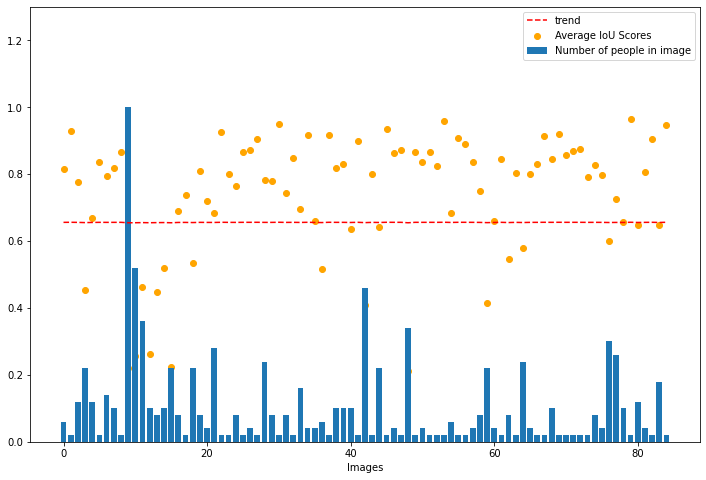

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

trend = np.polyfit(range(len(meanScores)), meanScores, 1)
trend1 = np.poly1d(trend)
plt.figure(figsize=(12,8))
plt.bar(range(len(meanScores)),colSizeTest/np.max(colSizeTest), label='Number of people in image')
plt.scatter(range(len(meanScores)), meanScores, color='orange', label='Average IoU Scores')

plt.plot(trend1((meanScores)), '--r', label='trend')

plt.xlabel('Images')
plt.ylim([0,1.3])
plt.legend(loc='best')

### Precision-Recall Curve

In [40]:
def calc_precision_recall(image_results):
    """Calculates precision and recall from the set of images
    Args:
        img_results (dict): dictionary formatted like:
            {
                'img_id1': {'true_pos': int, 'false_pos': int, 'false_neg': int},
                'img_id2': ...
                ...
            }
    Returns:
        tuple: of floats of (precision, recall)
    """
    true_positive=0
    false_positive=0
    false_negative=0
    for img_id, res in image_results.items():
        true_positive +=res['true_positive']
        false_positive += res['false_positive']
        false_negative += res['false_negative']
        try:
            precision = np.abs(true_positive)/(np.abs(true_positive) + np.abs(false_positive))
        except ZeroDivisionError:
            precision=0.0
        try:
            recall = np.abs(true_positive)/(np.abs(true_positive) + np.abs(false_negative))
        except ZeroDivisionError:
            recall=0.0
    return (precision, recall)

In [41]:
def get_single_image_results(gt_boxes, pred_boxes, iou_thr):
    """Calculates number of true_pos, false_pos, false_neg from single batch of boxes.
    Args:
        gt_boxes (list of list of floats): list of locations of ground truth
            objects as [xmin, ymin, xmax, ymax]
        pred_boxes (dict): dict of dicts of 'boxes' (formatted like `gt_boxes`)
            and 'scores'
        iou_thr (float): value of IoU to consider as threshold for a
            true prediction.
    Returns:
        dict: true positives (int), false positives (int), false negatives (int)
    """
    all_pred_indices= range(len(pred_boxes))
    all_gt_indices=range(len(gt_boxes))
    if len(all_pred_indices)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    if len(all_gt_indices)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    
    gt_idx_thr=[]
    pred_idx_thr=[]
    ious=[]
    for ipb, pred_box in enumerate(pred_boxes['boxes']):
        for igb, gt_box in enumerate(gt_boxes):
            iou= calc_iou(gt_box, pred_box)
            
            if iou >iou_thr:
                gt_idx_thr.append(igb)
                pred_idx_thr.append(ipb)
                ious.append(iou)
    iou_sort = np.argsort(ious)[::1]
    if len(iou_sort)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    else:
        gt_match_idx=[]
        pred_match_idx=[]
        for idx in iou_sort:
            gt_idx=gt_idx_thr[idx]
            pr_idx= pred_idx_thr[idx]
            # If the boxes are unmatched, add them to matches
            if(gt_idx not in gt_match_idx) and (pr_idx not in pred_match_idx):
                gt_match_idx.append(gt_idx)
                pred_match_idx.append(pr_idx)
        tp= len(gt_match_idx)
        fp= len(pred_boxes) - len(pred_match_idx)
        fn = len(gt_boxes) - len(gt_match_idx)
    return {'true_positive': tp, 'false_positive': fp, 'false_negative': fn}

In [42]:
IoU_thr = 0.7
imageResultsDict = {}
for imageName in fileNamesTest:
    imageResultsDict[imageName] = get_single_image_results(dictGTBoxesDict[imageName], dictPredBoxesDict[imageName], IoU_thr)    

In [43]:
precision, recall = calc_precision_recall(imageResultsDict)
print(precision, recall)

0.7837837837837838 0.535796766743649
